<b>Car price Prediction:</b>

<b> project car price prediction<b/>
    Here we are going to predict car price
    using linear regression and build a <b>Model<b/> using <b>'Machine Learning'</b>
    

<b>Here is the description of each varriabls of dataset</b>

<li>1.company=company name(categorical)</li>
<li>2.body-style=body of the car(categorical)</li>
<li>3.wheel-base=wheelbase of car(numeric)</li>
<li>4.length=length of car(numeric)</li>
<li>5.engine-type=type of engine(categorical)</li>
<li>6.number-of-cylinders=number of cylinders in car(categorical)</li>
<li>7.horsepower=hp(numeric)</li>
<li>8.average-milage=avg milage of car(numeric)</li>
<li>9.price=price of car(numeric)</li>


<b>what we will do??</b>
    <li>.reading the data</li>
    <li>.data cleaning</li>
<li>3.dealing with duplicates and non significant columns<li>
    <li>4.exploring columns</li>
    <li>5.data visualization</li>
    <li>6.data preparation</li>
    <li>7.spliting the data into train test</li>
    <li>8.model building using linear regression</li>

<b>import all the necessary libraries for this project</b>

In [ ]:
#importing all the libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler


READING THE DATA

In [2]:
automobile=pd.read_csv('../../data/Automobile/Automobile.csv',index_col='index')
automobile
#our dataframe name is 'automobile'.

,Unnamed: 0,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,,
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...
81,56,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
82,57,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
86,58,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0


<b>Information of our dataframe</b>

In [3]:
#head of the dataset
automobile.head()
#give us first five rows

,Unnamed: 0,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,,
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


In [4]:
#tail of the dataset
automobile.tail()
#give us last five rows

,Unnamed: 0,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,,
81,56,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
82,57,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
86,58,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
87,59,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0
88,60,volvo,wagon,104.3,188.8,ohc,four,114,23,13415.0


if you want to see only first ten rows then

In [5]:
automobile.head(10)
#give us first 10 rows using(10)
#same use also for tail

,Unnamed: 0,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,,
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
5,5,audi,sedan,99.8,177.3,ohc,five,110,19,15250.0
6,6,audi,wagon,105.8,192.7,ohc,five,110,19,18920.0
9,7,bmw,sedan,101.2,176.8,ohc,four,101,23,16430.0
10,8,bmw,sedan,101.2,176.8,ohc,four,101,23,16925.0


In [6]:
#shape of data:
automobile.shape

(61, 10)

In [7]:
#all the information of data:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 88
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        61 non-null     int64  
 1   company           61 non-null     object 
 2   body-style        61 non-null     object 
 3   wheel-base        61 non-null     float64
 4   length            61 non-null     float64
 5   engine-type       61 non-null     object 
 6   num-of-cylinders  61 non-null     object 
 7   horsepower        61 non-null     int64  
 8   average-mileage   61 non-null     int64  
 9   price             58 non-null     float64
dtypes: float64(3), int64(3), object(4)
memory usage: 5.2+ KB


In [8]:
#describe the data:
automobile.describe()

,Unnamed: 0,wheel-base,length,horsepower,average-mileage,price
count,61.000000,61.000000,61.000000,61.000000,61.000000,58.000000
mean,30.000000,98.481967,173.098361,107.852459,25.803279,15387.000000
std,17.752934,6.679234,14.021846,53.524398,8.129821,11320.259841
min,0.000000,88.400000,141.100000,48.000000,13.000000,5151.000000
25%,15.000000,94.500000,159.100000,68.000000,19.000000,6808.500000
50%,30.000000,96.300000,171.200000,100.000000,25.000000,11095.000000
75%,45.000000,101.200000,177.300000,123.000000,31.000000,18120.500000
max,60.000000,120.900000,208.100000,288.000000,47.000000,45400.000000


Removing "unnecessaries column"

In [9]:
#drop unnamed:0 column
automobile.drop('Unnamed: 0',axis=1,inplace=True)
#inplace=true ,means changes in also original dataset

<b>Dealing with duplicate values</b>

In [10]:
#dealing with duplicate:
automobile.duplicated()
#give us bool values

index
0     False
1     False
2     False
3     False
4     False
      ...  
81    False
82    False
86    False
87    False
88    False
Length: 61, dtype: bool

wow,, very good news there are no duplicates..hehe

In [11]:
automobile[automobile.duplicated]

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
32,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN


In [148]:
#null values identified:
automobile.isna()
#give us bool values

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
81,False,False,False,False,False,False,False,False,False
82,False,False,False,False,False,False,False,False,False
86,False,False,False,False,False,False,False,False,False


<b>if we want to find null values in any positional argument (if 'price')then process should be</b>

In [149]:
automobile[automobile['price'].isnull()]

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
31,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
32,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
63,porsche,hatchback,98.4,175.7,dohcv,eight,288,17,NaN


Breaking news there are three null values in price column

<b>Removing 'null values'</b>

In [12]:
#removing null values using dropna() func
automobile.dropna(inplace=True)
automobile

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
5,audi,sedan,99.8,177.3,ohc,five,110,19,15250.0
6,audi,wagon,105.8,192.7,ohc,five,110,19,18920.0
9,bmw,sedan,101.2,176.8,ohc,four,101,23,16430.0
10,bmw,sedan,101.2,176.8,ohc,four,101,23,16925.0


heheheh wow no null..).

In [ ]:
#drop unnamed:0 column
automobile.drop('Unnamed: 0',axis=1,inplace=True)
#inplace=true ,means changes in also original dataset

#this shell should be in top*must *

In [151]:
#now chaeck the data set's column
automobile.columns

Index(['company', 'body-style', 'wheel-base', 'length', 'engine-type',
       'num-of-cylinders', 'horsepower', 'average-mileage', 'price'],
      dtype='object')

In [152]:
#now we want to see info
automobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           58 non-null     object 
 1   body-style        58 non-null     object 
 2   wheel-base        58 non-null     float64
 3   length            58 non-null     float64
 4   engine-type       58 non-null     object 
 5   num-of-cylinders  58 non-null     object 
 6   horsepower        58 non-null     int64  
 7   average-mileage   58 non-null     int64  
 8   price             58 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 4.5+ KB


In [153]:
#exploring horsepower;
automobile['horsepower'].head()

index
0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int64

<b>using seaborn to visualize horsepower column </b>

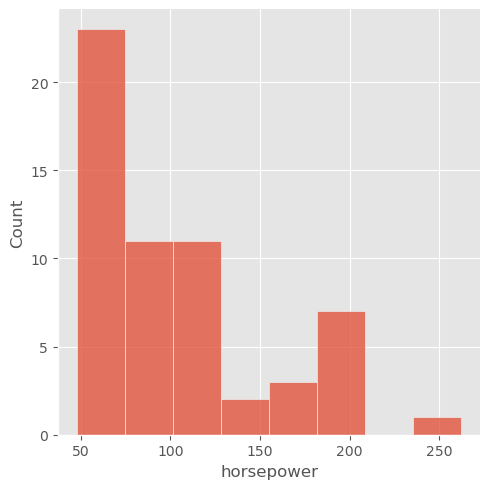

In [154]:
#using displot 
sns.displot(automobile['horsepower'])

<b>using values_counts() ,exploring car company</b>

In [155]:
automobile['company'].value_counts()

toyota           7
bmw              6
mazda            5
nissan           5
audi             4
mercedes-benz    4
mitsubishi       4
volkswagen       4
alfa-romero      3
chevrolet        3
honda            3
jaguar           3
dodge            2
porsche          2
volvo            2
isuzu            1
Name: company, dtype: int64

woww get the answer...

<b>visualize company column </b>

Text(0, 0.5, 'numbers of cars ')

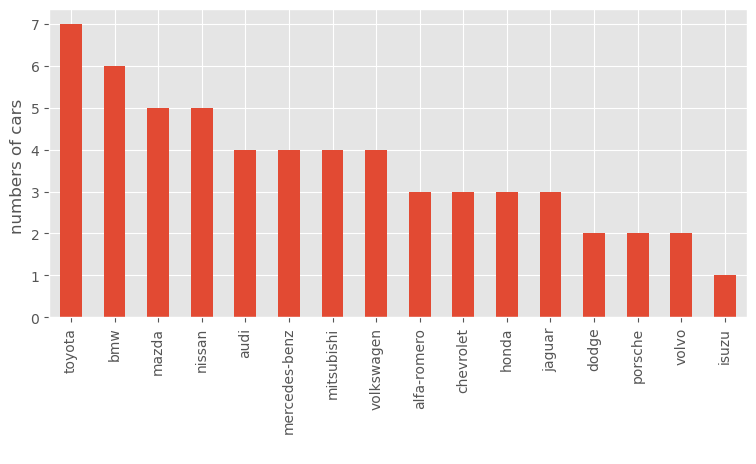

In [156]:
#procees 1
plt.figure(figsize=(9,4))
plt.style.use('ggplot')#style use
automobile['company'].value_counts().plot(kind='bar')#plotting this use'.plot '
plt.xlabel(' ')#' ' means all the company in xlabel
plt.ylabel('numbers of cars ')#ylabel name is 'num....',you can use anything

In [157]:
#total num-of -cylinders using value count
automobile['num-of-cylinders'].value_counts()

four      37
six       11
five       5
eight      2
three      1
twelve     1
two        1
Name: num-of-cylinders, dtype: int64

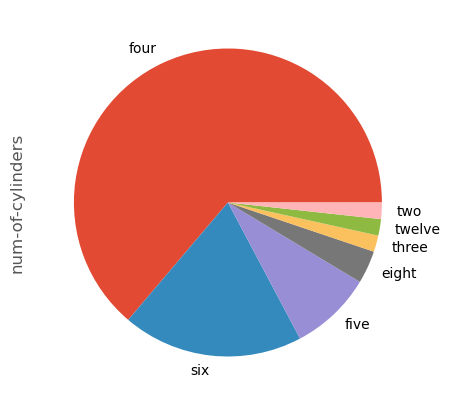

In [158]:
#process 2
#now visualize the num-of-cylinders(plotting)
plt.figure(figsize=(9,5))
plt.style.use('ggplot')#style
automobile['num-of-cylinders'].value_counts().plot(kind='pie')#pie plottoing
plt.show()


<b>body-style total values using value_counts()</b>

In [159]:
#body-style value count:
automobile['body-style'].value_counts()

sedan          30
hatchback      14
wagon           9
convertible     3
hardtop         2
Name: body-style, dtype: int64

<AxesSubplot:xlabel='body-style', ylabel='count'>

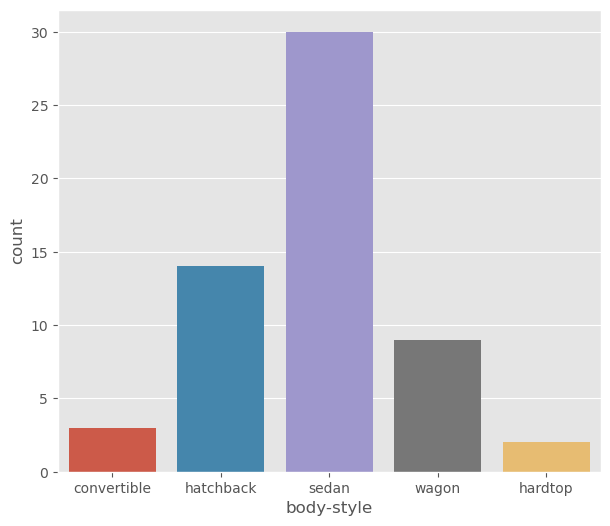

In [160]:
#process 3
#now visualize using bar plot
plt.figure(figsize=(7,6))
plt.style.use('ggplot')

sns.countplot(x ='body-style',data = automobile)
#using sns countplot , just give x, y can automatically count and put the dataset name

<b>wow its the easiest step.Here we are doing 3 kind of steps ,you can use one of them,but process 3 is the easiest step to visualize</b>

another example for clear concept

In [161]:
#trying it in engine type
automobile['engine-type'].value_counts()

ohc      44
dohc      5
ohcv      5
ohcf      2
l         1
rotor     1
Name: engine-type, dtype: int64

<AxesSubplot:xlabel='engine-type', ylabel='count'>

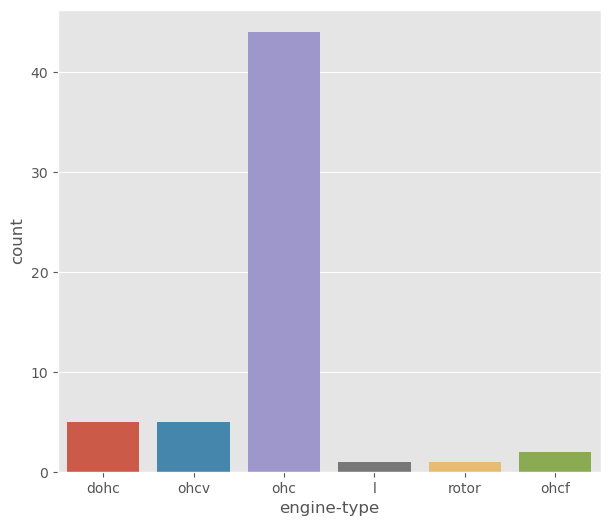

In [162]:
#Now visualize it using .....
plt.figure(figsize=(7,6))
plt.style.use('ggplot')#you can use any style
sns.countplot(x='engine-type', data = automobile)


wow,'ohc' engine type is more than others,get the answer

<b>all above are the chategorical values </b>

<b><i>NOW WE ARE PLOTTING NUMERICAL VALUES</i></b>

In [163]:
#describe
automobile.describe()

,wheel-base,length,horsepower,average-mileage,price
count,58.000000,58.000000,58.000000,58.000000,58.000000
mean,98.620690,173.646552,106.051724,25.534483,15387.000000
std,6.810589,14.005616,48.915402,7.932203,11320.259841
min,88.400000,141.100000,48.000000,13.000000,5151.000000
25%,94.500000,165.300000,68.000000,19.000000,6808.500000
50%,96.400000,171.450000,100.000000,24.500000,11095.000000
75%,101.800000,182.775000,122.500000,31.000000,18120.500000
max,120.900000,208.100000,262.000000,47.000000,45400.000000


<b>using boxplot to explore the car length</b>

<AxesSubplot:>

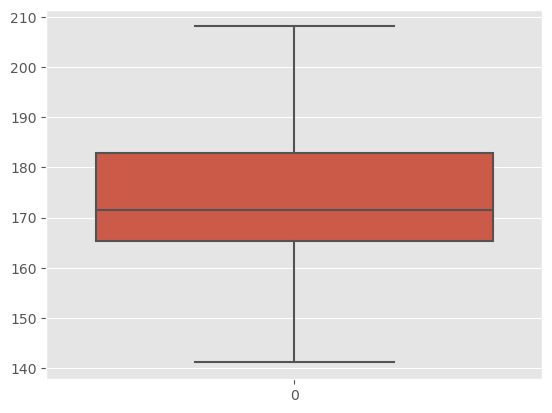

In [164]:

sns.boxplot(automobile['length'])

woww get the answer

(array([20.,  8., 11.,  6.,  2.,  3.,  5.,  2.,  0.,  1.]),
 array([ 48. ,  69.4,  90.8, 112.2, 133.6, 155. , 176.4, 197.8, 219.2,
        240.6, 262. ]),
 <BarContainer object of 10 artists>)

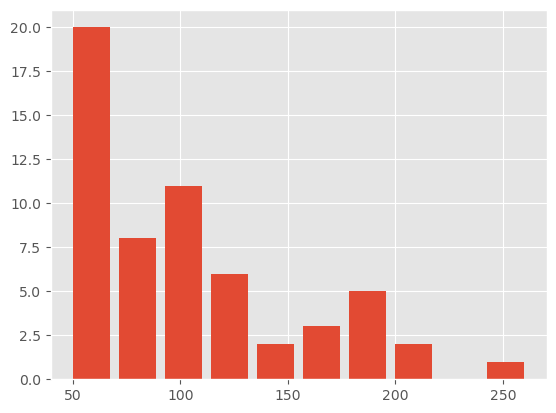

In [165]:
#using hist:
plt.hist(automobile['horsepower'],bins=10,rwidth=0.8)

<b>plotting numeric values to visualize</b>

using' histrogram' plotting we can visualize all the plotting 

array([[<AxesSubplot:title={'center':'wheel-base'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'average-mileage'}>]], dtype=object)

<Figure size 800x700 with 0 Axes>

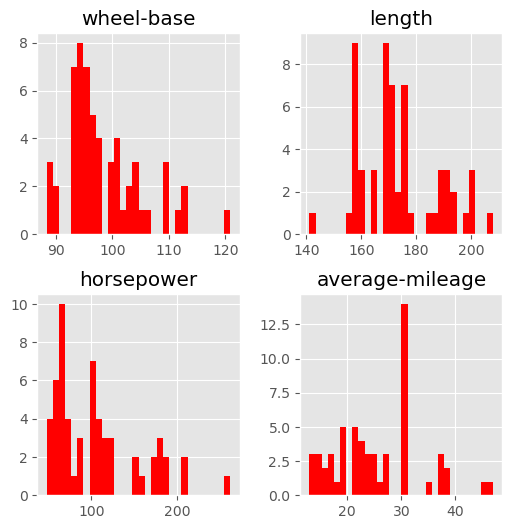

In [166]:
plt.figure(figsize=(8,7))
plt.style.use('ggplot')
automobile[['wheel-base','length','horsepower','average-mileage']].hist(bins=30, figsize=(6,6), color='r')

<b>NOW WE ARE SEEING SOME OF USEFULL FUNCTION</b>

In [78]:
#rename any column and show it like frame then;
automobile.isna().sum().to_frame().rename(columns={0:"missing values"})
   #here column 0 turn into 'missing values'                                             

,missing values
Unnamed: 0,0
index,0
company,0
body-style,0
wheel-base,0
length,0
engine-type,0
num-of-cylinders,61
horsepower,0
average-mileage,0


In [74]:
#type function
automobile.select_dtypes(include=['int64','float64'])
#we can see only int and float type

,wheel-base,length,horsepower,average-mileage,price
index,,,,,
0,88.6,168.8,111,21,13495.0
1,88.6,168.8,111,21,16500.0
2,94.5,171.2,154,19,16500.0
3,99.8,176.6,102,24,13950.0
4,99.4,176.6,115,18,17450.0
5,99.8,177.3,110,19,15250.0
6,105.8,192.7,110,19,18920.0
9,101.2,176.8,101,23,16430.0
10,101.2,176.8,101,23,16925.0


In [167]:
automobile.select_dtypes(['object'])
#only get object type

,company,body-style,engine-type,num-of-cylinders
index,,,,
0,alfa-romero,convertible,dohc,four
1,alfa-romero,convertible,dohc,four
2,alfa-romero,hatchback,ohcv,six
3,audi,sedan,ohc,four
4,audi,sedan,ohc,five
5,audi,sedan,ohc,five
6,audi,wagon,ohc,five
9,bmw,sedan,ohc,four
10,bmw,sedan,ohc,four


<Figure size 5000x5000 with 0 Axes>

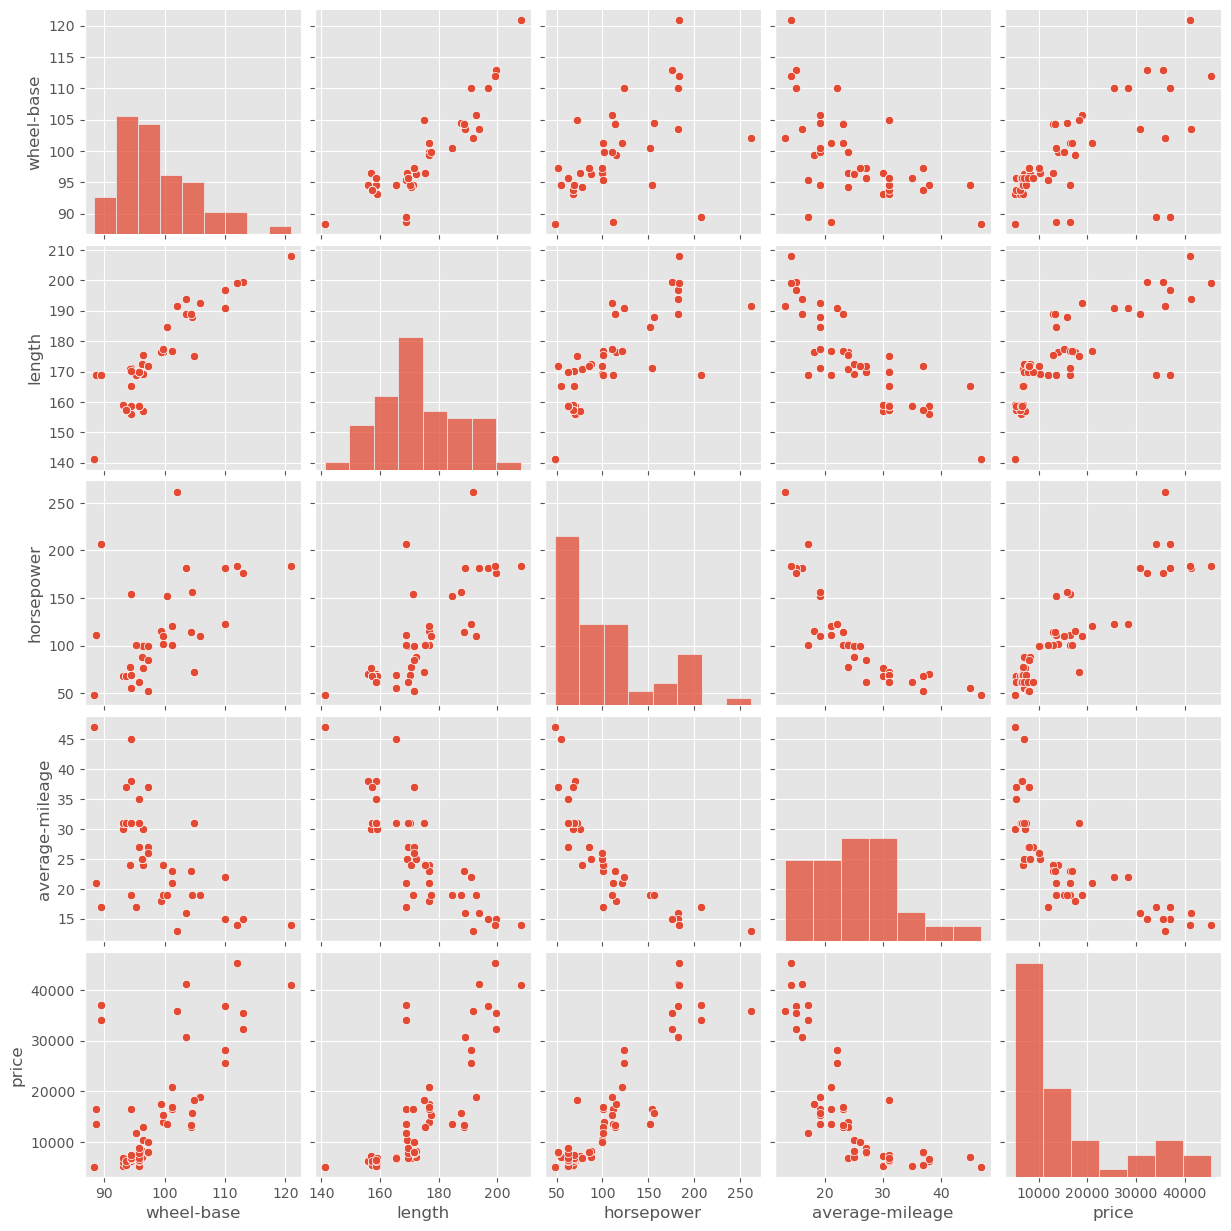

In [168]:
plt.figure(figsize=(50,50))
sns.pairplot(automobile)

<b>NOW THE MAIN PART IS 
MACHINE LEARNING USING LINEAR REGRESSION TO PREDICT CAR PRICE</b>

<b><i>At first 
    <li>we must find out target and feature</li>
    <li>corelation with price</li>
    <li>we know our target variable is 'price'</li>
    <li>convert all the features values into numeric</li>
    <li>train the data,then test,then all the necessaries ways to follow</li></i></b>

<b>Now we are doing some comparison between "Price"and all other variable</b>

<Figure size 600x600 with 0 Axes>

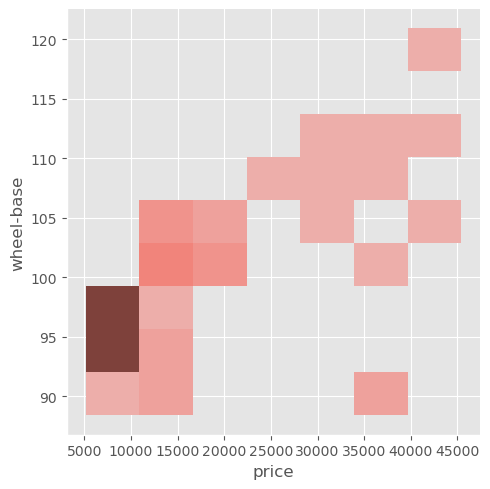

In [169]:
#using displot:
plt.figure(figsize=(6,6))
plt. style.use('ggplot')
sns.displot(x='price', y='wheel-base',data=automobile)

<li>Here we are adding title </li>

Text(0.5, 1.0, 'length wise price')

<Figure size 800x800 with 0 Axes>

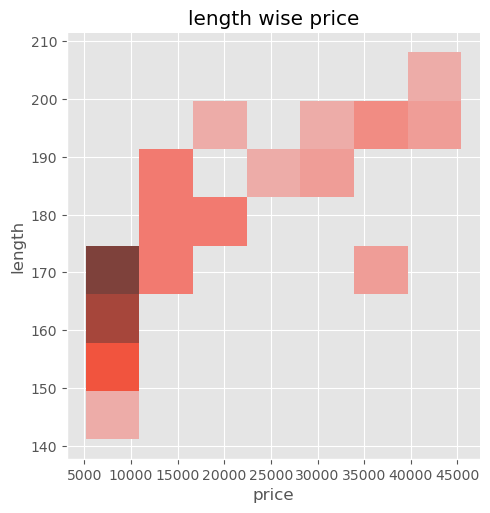

In [170]:
plt.figure(figsize=(8,8))
plt.style.use('ggplot')
sns.displot(x='price', y='length', data=automobile,)
plt.title('length wise price')#title

<li>Here we are adding<b> 'hue'</b> and <b>'legend'</b></li>

<Figure size 700x700 with 0 Axes>

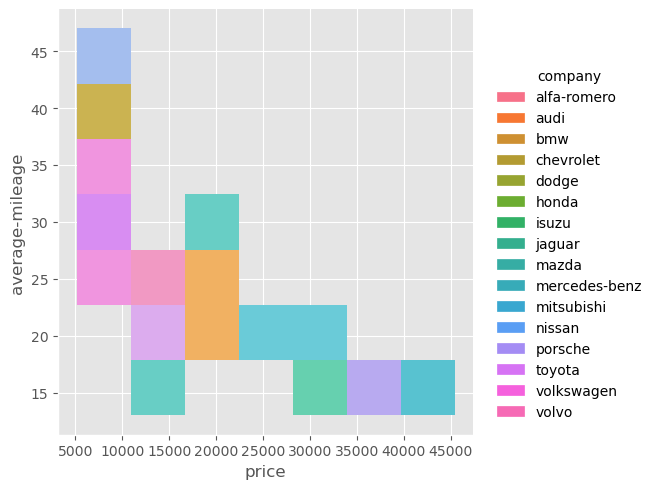

In [82]:
plt.figure(figsize=(7,7))
plt.style.use('ggplot')
sns.displot(x='price', y='average-mileage', hue='company',legend=True,data=automobile)

Take another comparison between price and other vars

<Figure size 500x700 with 0 Axes>

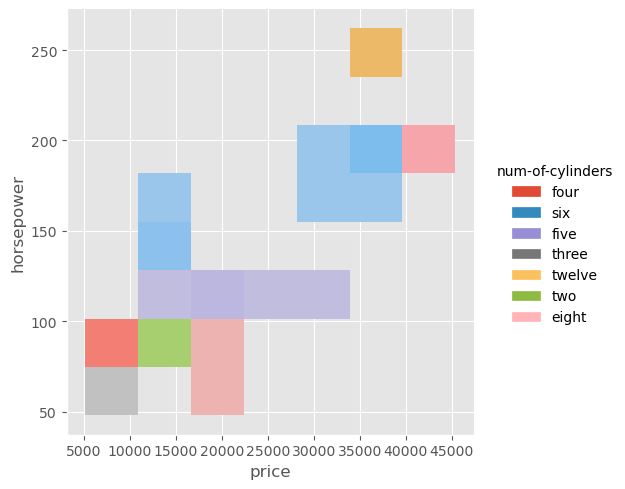

In [83]:
plt.figure(figsize=(5,7))
plt.style.use('ggplot')
sns.displot(x='price', y='horsepower', hue='num-of-cylinders',legend=True, data=automobile)

<b>Now create a bar plot between price and company</b>

<AxesSubplot:xlabel='price', ylabel='company'>

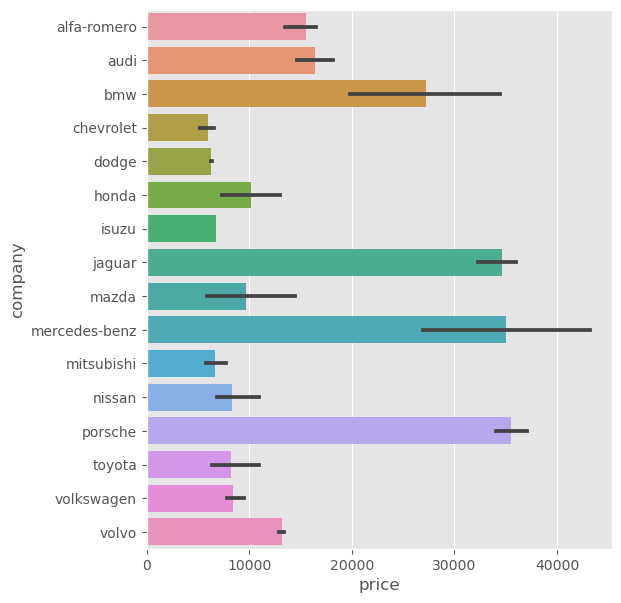

In [171]:
plt.figure(figsize=(6,7))
plt.style.use('ggplot')
sns.barplot(x='price', y='company',data=automobile)

<b>plotting between price and body style</b>

<AxesSubplot:xlabel='price', ylabel='body-style'>

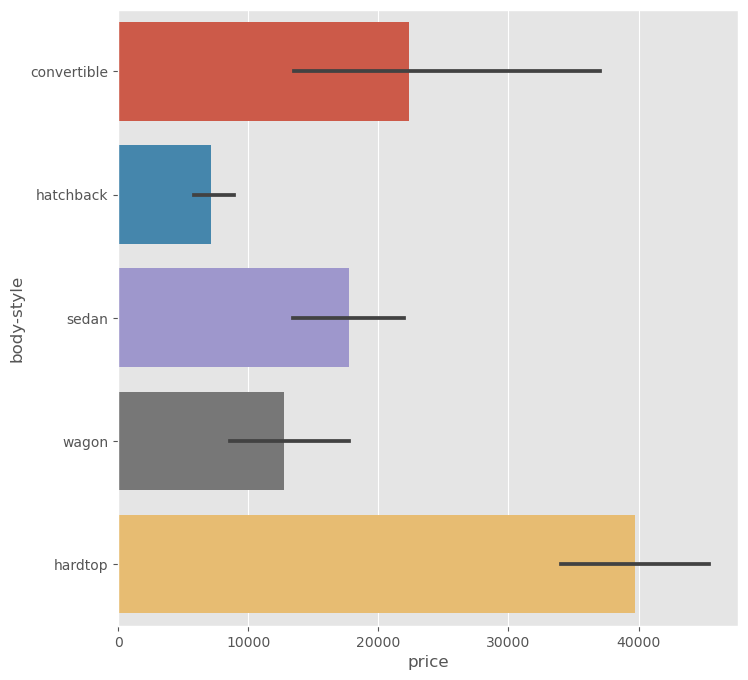

In [172]:
plt.figure(figsize=(8,8))
plt.style.use('ggplot')
sns.barplot(x='price', y='body-style',data=automobile)

<b> price and num of cylinders</b>

<AxesSubplot:xlabel='num-of-cylinders', ylabel='price'>

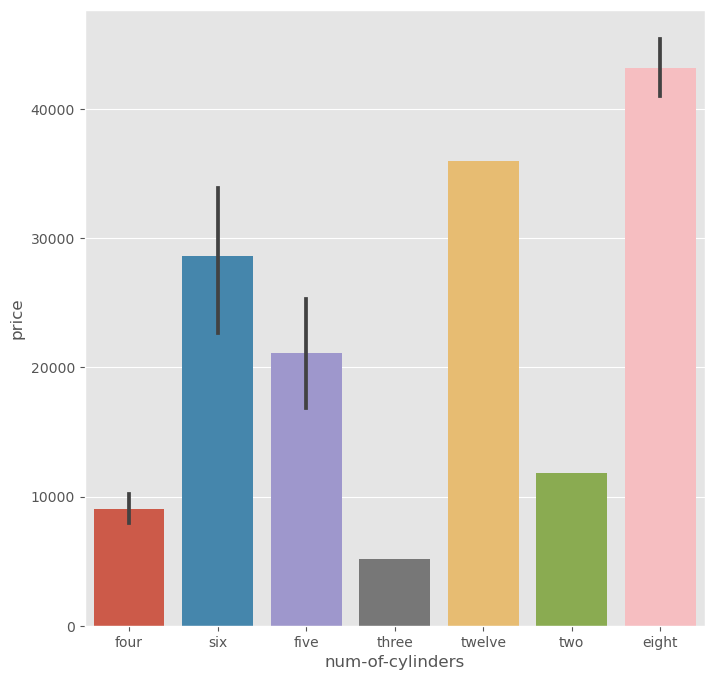

In [173]:
plt.figure(figsize=(8,8))
plt.style.use('ggplot')
sns.barplot(x='num-of-cylinders',y='price', data=automobile)

<b><li>NOW WE ARE CONVERTING CHATEGORICAL VALUES to NUMERICAL VALUES,</li>
    <li>USING='Label Encoder'</b></li>

In [13]:
#here we are using fit_transform func:
automobile_new_label=LabelEncoder()#using labelencoder in dataframe
automobile_new_label

LabelEncoder()

In [14]:
automobile['company']=automobile_new_label.fit_transform(automobile['company'])

wow, hurreh! all car company values are showing like numeric values...yes

<b>Now change next all the charecter values </b>

In [16]:
automobile['body-style']=automobile_new_label.fit_transform(automobile['body-style'])
automobile['engine-type']=automobile_new_label.fit_transform(automobile['engine-type'])#using fit_transform

In [15]:
automobile['body-style']=automobile_new_label.fit_transform(automobile['body-style'])

<i>fit_transform is a function where automatically change the charecter value to numeric,</i>

<b>Now we are replacing values character to numeric in one of column,</b>

In [22]:
automobile.replace({'num-of-cylinders':{'four':4,
                                        'six':6,
                                        'five':5,
                                        'three':3,
                                        'twelve':12,
                                        'two':2,
                                       'eight':8}
                   })

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,0,0,88.6,168.8,0,4,111,21,13495.0
1,0,0,88.6,168.8,0,4,111,21,16500.0
2,0,2,94.5,171.2,4,6,154,19,16500.0
3,1,3,99.8,176.6,2,4,102,24,13950.0
4,1,3,99.4,176.6,2,5,115,18,17450.0
5,1,3,99.8,177.3,2,5,110,19,15250.0
6,1,4,105.8,192.7,2,5,110,19,18920.0
9,2,3,101.2,176.8,2,4,101,23,16430.0
10,2,3,101.2,176.8,2,4,101,23,16925.0


<b>yes !yes... oh god thannk you so much.. we get all values in numeric format</b>

<b>now check the information</b>

In [33]:
automobile.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           58 non-null     int32  
 1   body-style        58 non-null     int64  
 2   wheel-base        58 non-null     float64
 3   length            58 non-null     float64
 4   engine-type       58 non-null     int32  
 5   num-of-cylinders  58 non-null     object 
 6   horsepower        58 non-null     int64  
 7   average-mileage   58 non-null     int64  
 8   price             58 non-null     float64
dtypes: float64(3), int32(2), int64(3), object(1)
memory usage: 4.1+ KB


yes yess all in numeric

In [34]:
automobile.corr()

C:\Users\Sampad\AppData\Local\Temp\ipykernel_17848\688169625.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  automobile.corr()


,company,body-style,wheel-base,length,engine-type,horsepower,average-mileage,price
company,1.000000,0.190051,-0.012603,-0.047085,0.126324,-0.187885,0.242883,-0.205502
body-style,0.190051,1.000000,0.432152,0.322310,-0.033776,-0.135047,0.022190,-0.110904
wheel-base,-0.012603,0.432152,1.000000,0.881866,0.070895,0.509146,-0.547084,0.663085
length,-0.047085,0.322310,0.881866,1.000000,0.091408,0.727067,-0.780370,0.788465
engine-type,0.126324,-0.033776,0.070895,0.091408,1.000000,0.247286,-0.204637,0.191193
horsepower,-0.187885,-0.135047,0.509146,0.727067,0.247286,1.000000,-0.842615,0.901707
average-mileage,0.242883,0.022190,-0.547084,-0.780370,-0.204637,-0.842615,1.000000,-0.770217
price,-0.205502,-0.110904,0.663085,0.788465,0.191193,0.901707,-0.770217,1.000000


C:\Users\Sampad\AppData\Local\Temp\ipykernel_17848\884411370.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(automobile.corr(),annot= True, cmap='coolwarm')


<AxesSubplot:>

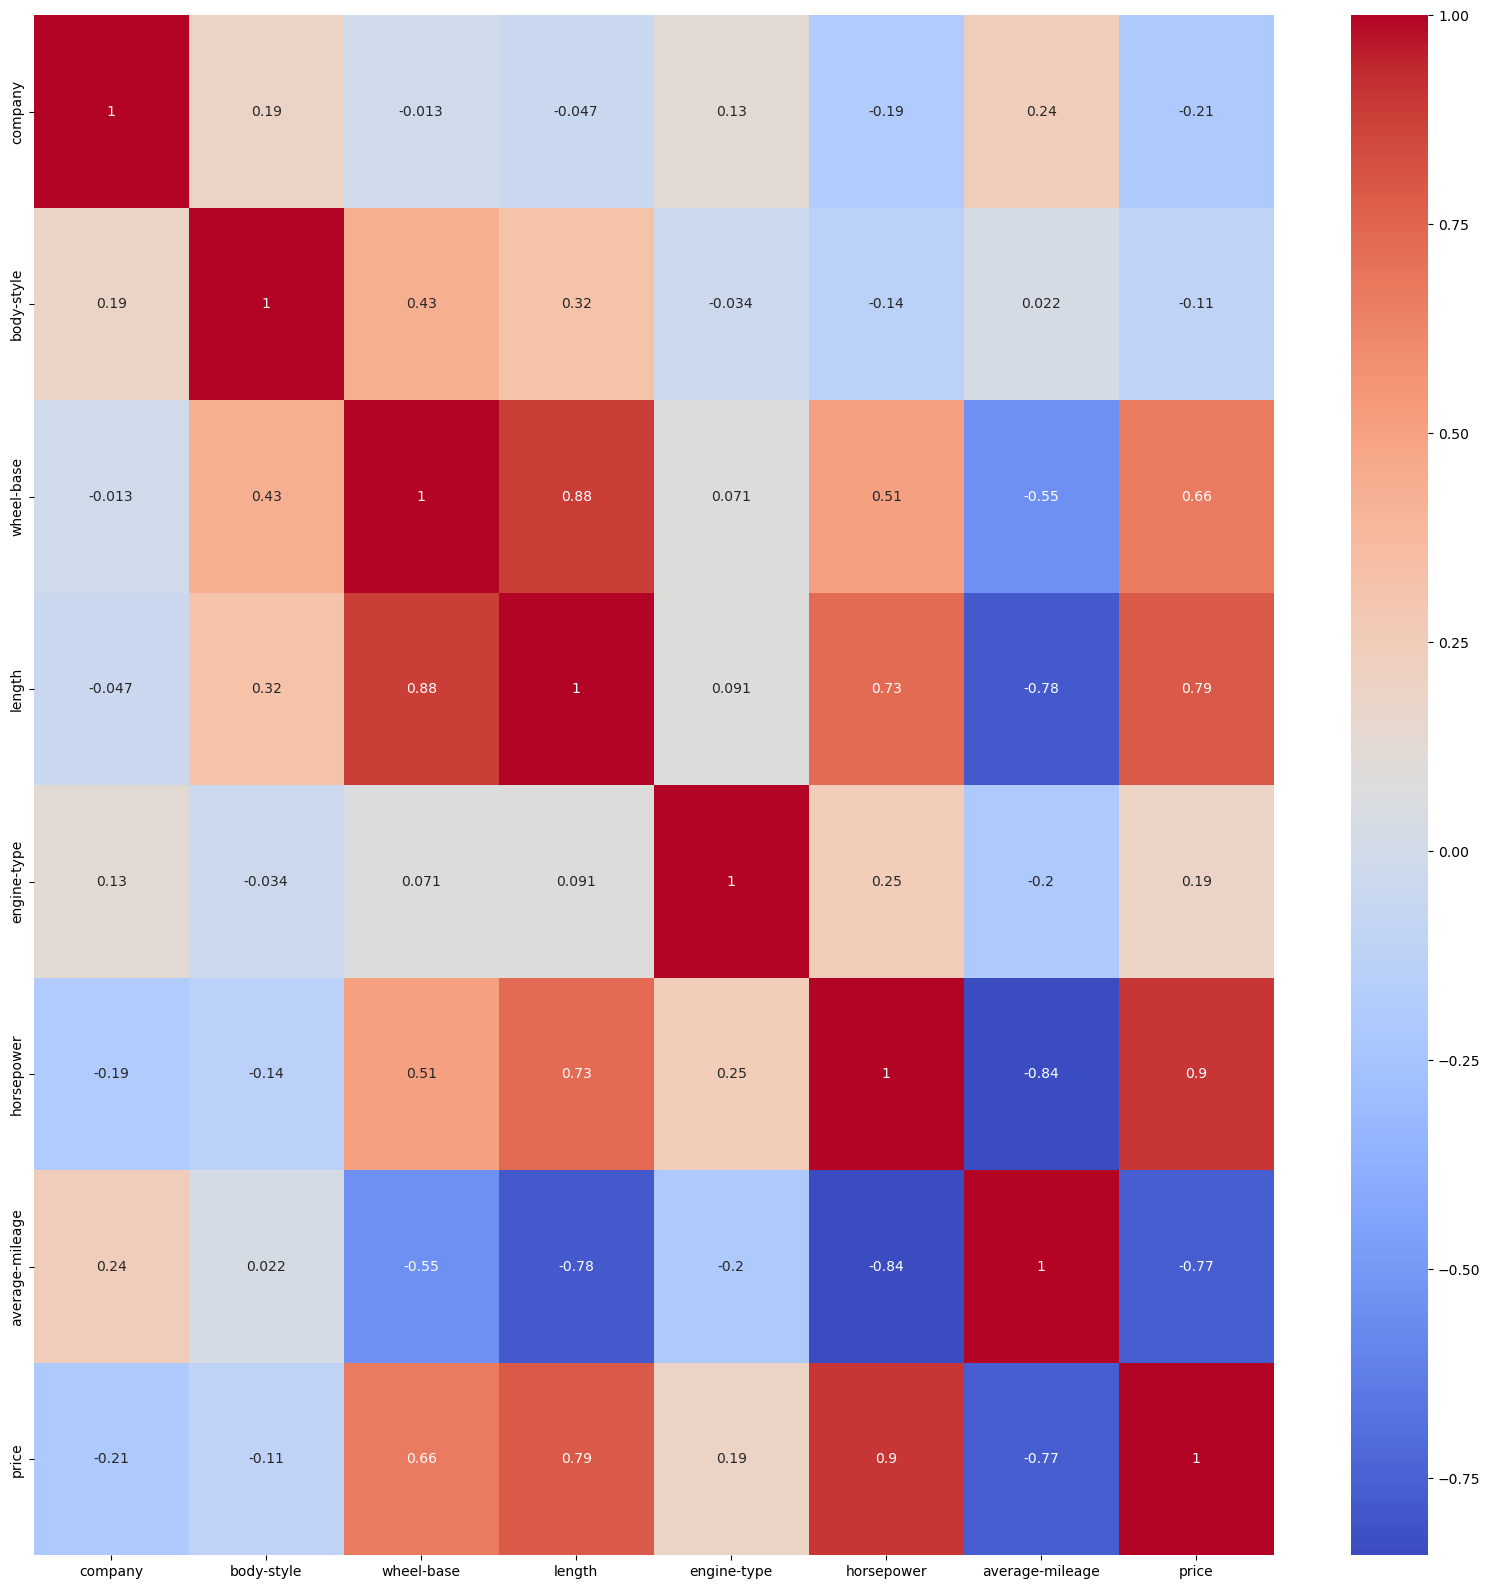

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(automobile.corr(),annot= True, cmap='coolwarm')

<AxesSubplot:>

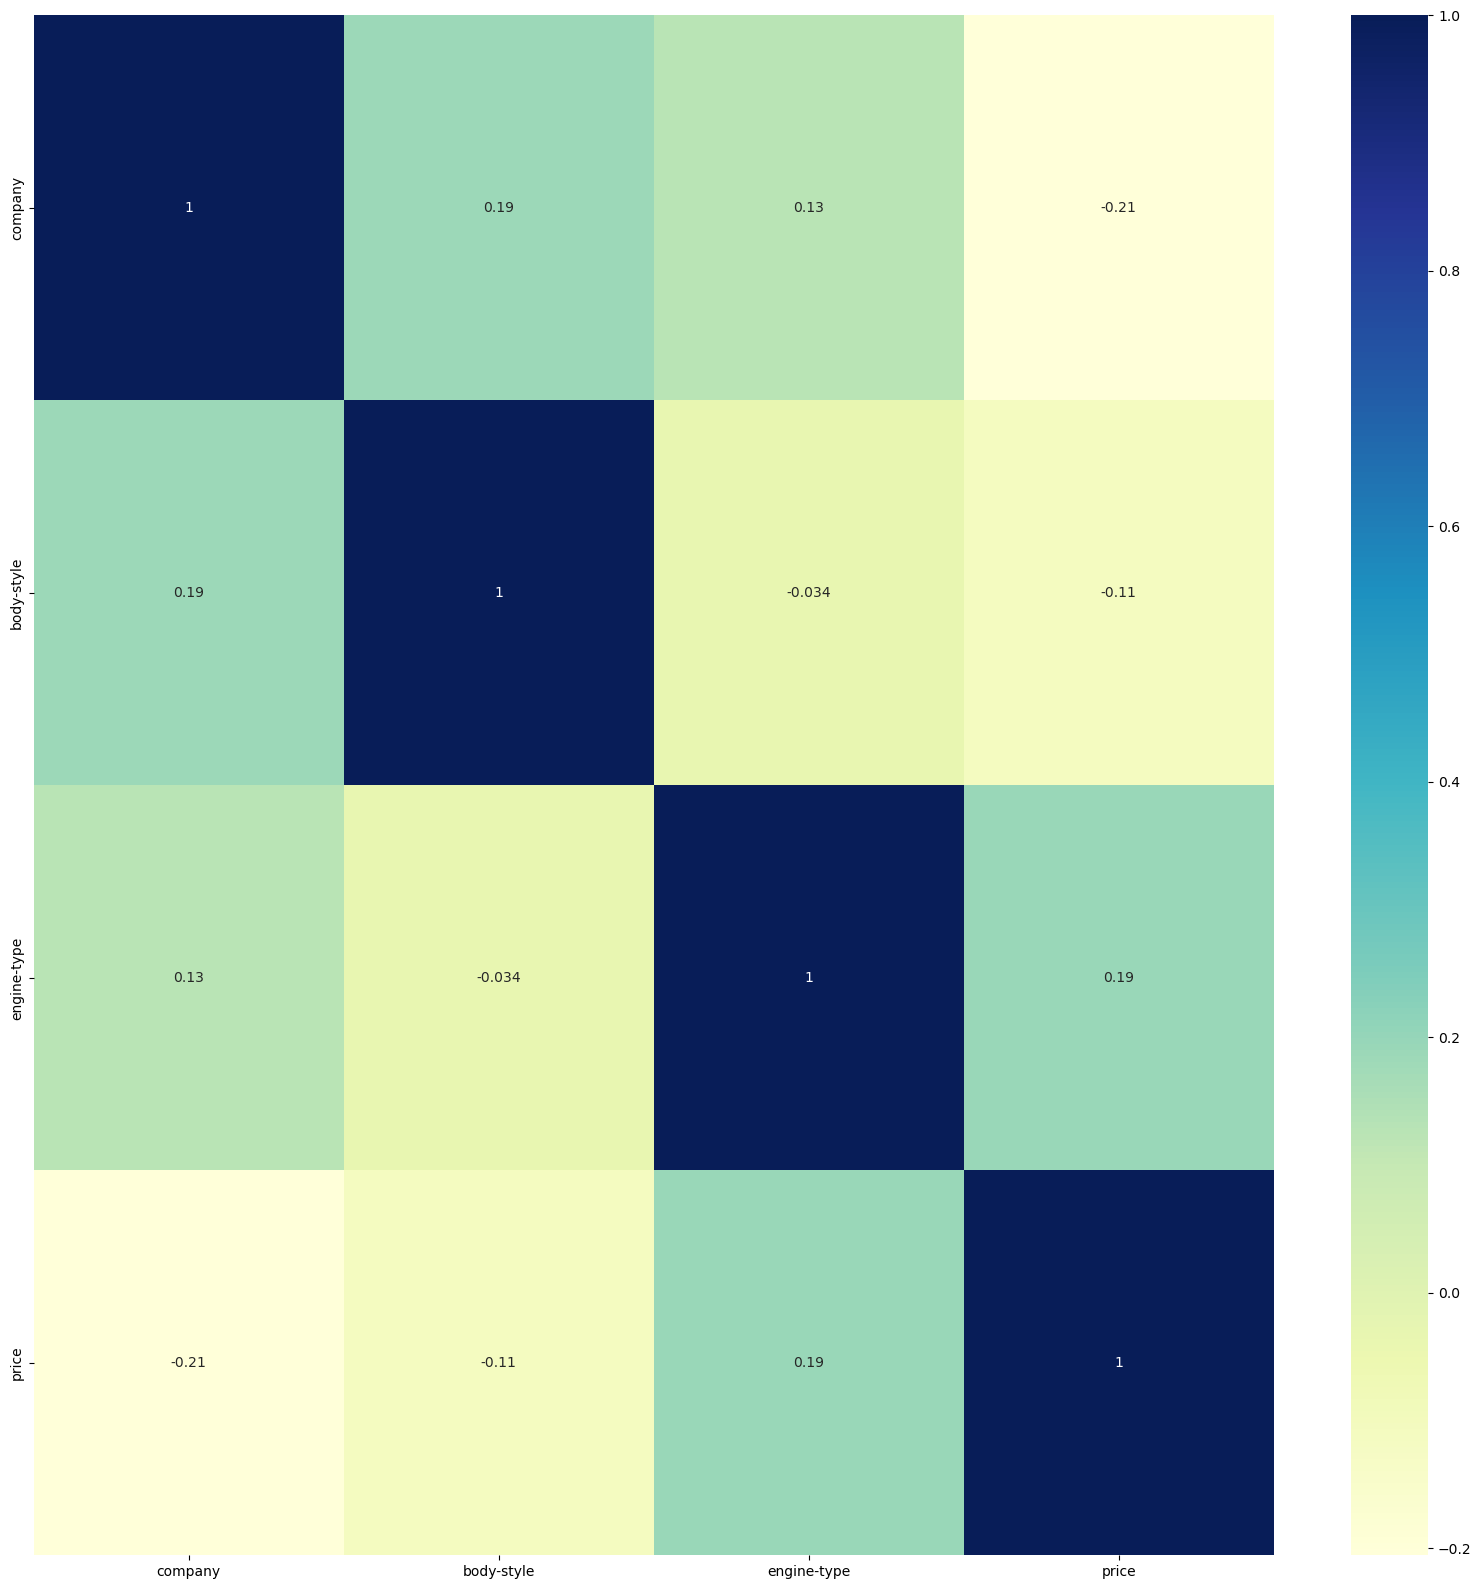

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(automobile[['company','body-style','engine-type','price']].corr(),annot=True, cmap="YlGnBu")


In [27]:
category_cols=automobile.select_dtypes(['object'])
for col in category_cols:
    print(automobile[col].unique())

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


<AxesSubplot:xlabel='average-mileage', ylabel='price'>

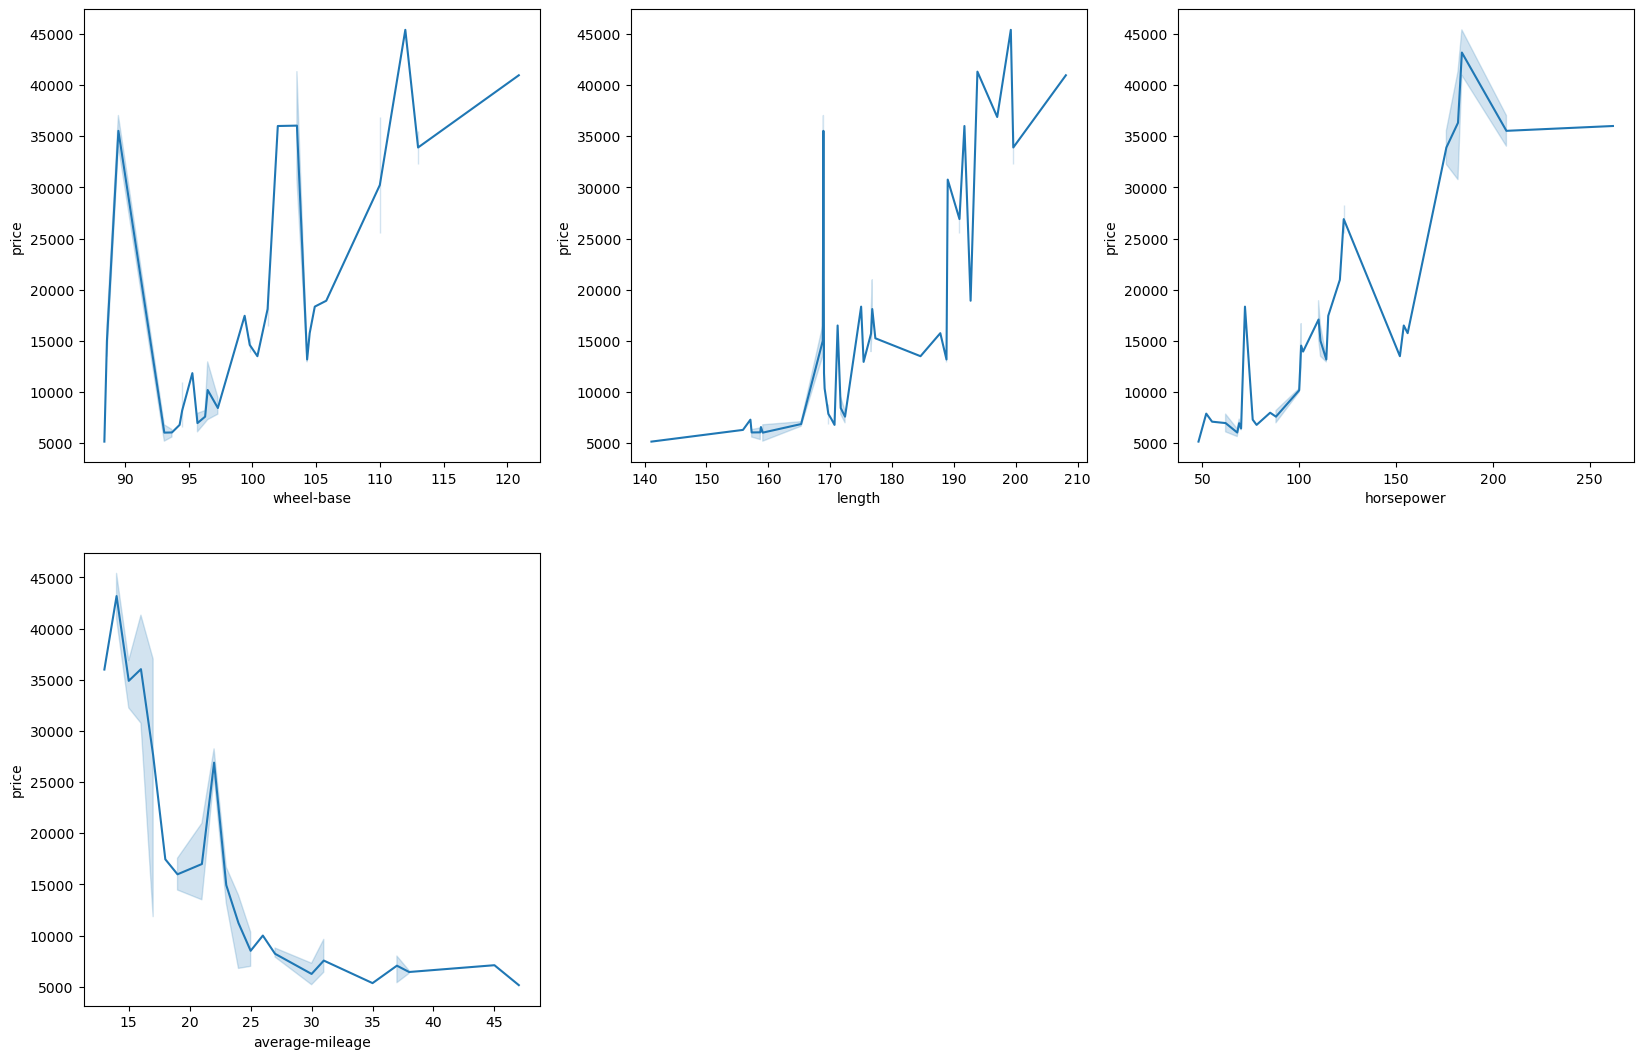

In [28]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.lineplot(x='wheel-base', y = 'price', data=automobile)

plt.subplot(3,3,2)
sns.lineplot(x='length', y='price', data=automobile)

plt.subplot(3,3,3)
sns.lineplot(x='horsepower', y='price', data=automobile)

plt.subplot(3,3,4)
sns.lineplot(x='average-mileage' , y='price', data=automobile)

In [29]:
automobile.fillna(method='ffill',inplace=True)
automobile

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,0,0,88.6,168.8,0,four,111,21,13495.0
1,0,0,88.6,168.8,0,four,111,21,16500.0
2,0,2,94.5,171.2,4,six,154,19,16500.0
3,1,3,99.8,176.6,2,four,102,24,13950.0
4,1,3,99.4,176.6,2,five,115,18,17450.0
5,1,3,99.8,177.3,2,five,110,19,15250.0
6,1,4,105.8,192.7,2,five,110,19,18920.0
9,2,3,101.2,176.8,2,four,101,23,16430.0
10,2,3,101.2,176.8,2,four,101,23,16925.0


<b>NOW WE ARE GOING TO SELECT TARGET VARIABLE AND FEATURE VARIABLE</b>

In [39]:
x = automobile.iloc[:,0:8]

In [40]:
x

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage
index,,,,,,,,
0,0,0,88.6,168.8,0,four,111,21
1,0,0,88.6,168.8,0,four,111,21
2,0,2,94.5,171.2,4,six,154,19
3,1,3,99.8,176.6,2,four,102,24
4,1,3,99.4,176.6,2,five,115,18
5,1,3,99.8,177.3,2,five,110,19
6,1,4,105.8,192.7,2,five,110,19
9,2,3,101.2,176.8,2,four,101,23
10,2,3,101.2,176.8,2,four,101,23


In [32]:
y

NameError: name 'y' is not defined

In [ ]:
automobile.dropna(inplace=True)
automobile
automobile.info()

In [ ]:
automobile.isna()

In [ ]:
x=pd.get_dummies(x)
x

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
x_train
x_train.isna()

In [ ]:
x_test

In [ ]:
y_train.isna()

In [ ]:
y_train.dropna(inplace=True)
y_train

In [ ]:
y_test.dropna(inplace=True)
y_test

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
car = LinearRegression()

In [ ]:
car.fit(x_train,y_train)

In [ ]:
car.fit(x_train,y_train)

In [ ]:
car.fit(x_train,y_train)

In [ ]:
automobile.dropna(inplace=True)
automobile

In [ ]:
automobile.info().sum()


In [ ]:
m = car.coef_
c = car.intercept_

In [ ]:
m

In [ ]:
c

In [ ]:
y_pred_test = car.predict(x_test)

In [ ]:
y_pred_test

In [62]:
from sklearn.metrics import mean_squared_error,r2_score

In [63]:
mean_squared_error(y_test, y_pred_test)

19464681.773110837

In [65]:
accuracy = r2_score(y_test, y_pred_test)

In [66]:
accuracy

0.9017920983189689

In [67]:
import seaborn as sns

In [68]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='price'>

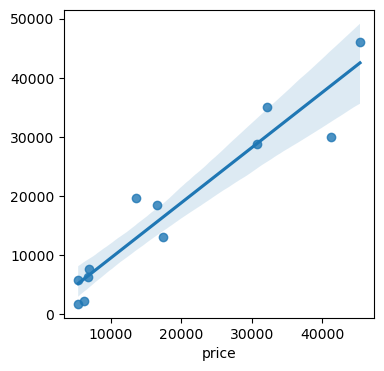

In [70]:
plt.figure(figsize=(4,4))
sns.regplot(x=y_test, y=y_pred_test)

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(5,5))

plt.style.use("ggplot")
plt.scatter(x=range(10),
            y=y_test.head(10),
            color="r")
plt.scatter(x=range(10),
            y=y_prediction_test[:,10],
            color="b")
